<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/06_Multicolinearidade_modelos_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISE DE MULTICOLINEARIDADE EM MODELOS DE REGRESSÃO

#Importação das bibliotecas

In [ ]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

## Importando os dados

In [ ]:
df_salarios = pd.read_csv('https://raw.githubusercontent.com/FranziskoB/Regressao_simples_multipla/main/dados/salarios.csv', delimiter=',')
df_salarios.head()

,nome,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
0,Patricia,2525.340820,9.0,4.50,9.0,4.50,3.0,9.0
1,Luiz,2498.574951,8.0,4.00,8.0,4.00,7.0,8.0
2,Dalila,2364.686768,9.5,4.75,9.5,4.75,10.0,9.5
3,Leonor,1981.349854,7.0,3.50,7.0,3.50,10.0,7.0
4,Ovidio,1892.807983,6.0,3.00,6.0,3.10,7.0,6.0


Características das variáveis do dataset

In [ ]:
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          15 non-null     object 
 1   salario       15 non-null     float64
 2   rh1           15 non-null     float64
 3   econometria1  15 non-null     float64
 4   rh2           15 non-null     float64
 5   econometria2  15 non-null     float64
 6   rh3           15 non-null     float64
 7   econometria3  15 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


Estatísticas univariadas

In [ ]:
df_salarios.describe()

,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,6.400000,3.200000,6.400000,3.240000,7.180000,6.400000
std,312.507361,2.221647,1.110823,2.221647,1.061367,3.169317,2.221647
min,1505.627563,3.000000,1.500000,3.000000,1.500000,1.400000,3.000000
25%,1870.515320,4.500000,2.250000,4.500000,2.250000,4.450000,4.500000
50%,2001.654297,7.000000,3.500000,7.000000,3.500000,8.000000,7.000000
75%,2219.607788,8.000000,4.000000,8.000000,4.000000,9.950000,8.000000
max,2525.340820,9.500000,4.750000,9.500000,4.750000,10.000000,9.500000


## Matriz de correlações

O primeiro e mais simples método para diagnóstico de multicolinearidade refere-se à identificação de altas 
correlações entre variáveis explicativas por meio da análise da matriz de correlação simples. Se, por um lado, este método apresenta uma grande facilidade de aplicação, por outro não consegue identificar eventuais relações 
existentes entre mais de duas variáveis simultaneamente. 

FÁVERO, Luiz Paulo Lopes e BELFIORE, Patrícia Prado. Manual de análise de dados: estatística e modelagem multivariada com excel, SPSS e stata. . Rio de Janeiro: Elsevier. . Acesso em: 05 mar. 2023. , 2017

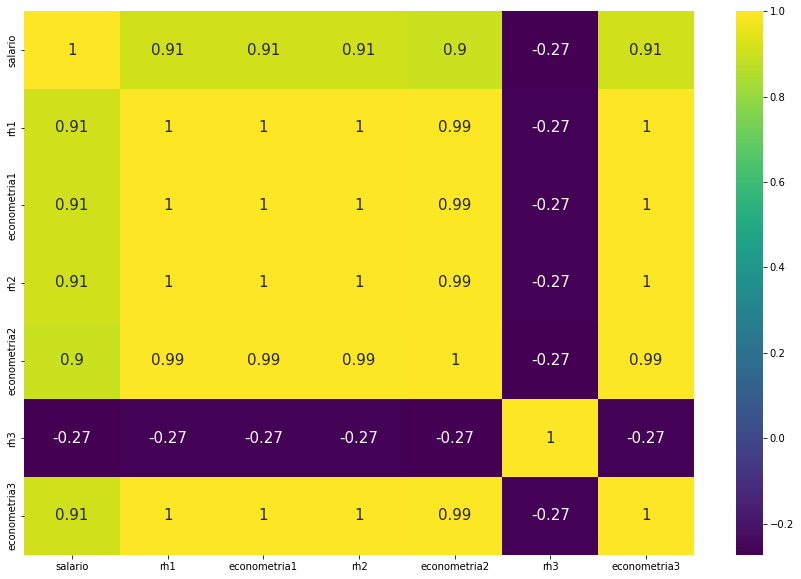

In [ ]:
corr = df_salarios.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_salarios.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':15})
plt.show()

##CORRELAÇÃO PERFEITA

###Estimando um modelo
variáveis preditoras com correlação perfeita

In [ ]:
modelo_1 = sm.OLS.from_formula('salario ~ rh1 + econometria1',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_1.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.69e-06
Time:                        18:04:10   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1            102.2939     13.007      7.865      0.000      74.194     130.394
econometria1    51.1469      6.504      7.865      0.000      37.097      65.197
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                     5.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Os modelos apresentaram os Betas proporcionais, em alguns pode apresentar um beta igual a zero devido a correlação perfeita. 

##CORRELAÇÃO BAIXA

<AxesSubplot:>

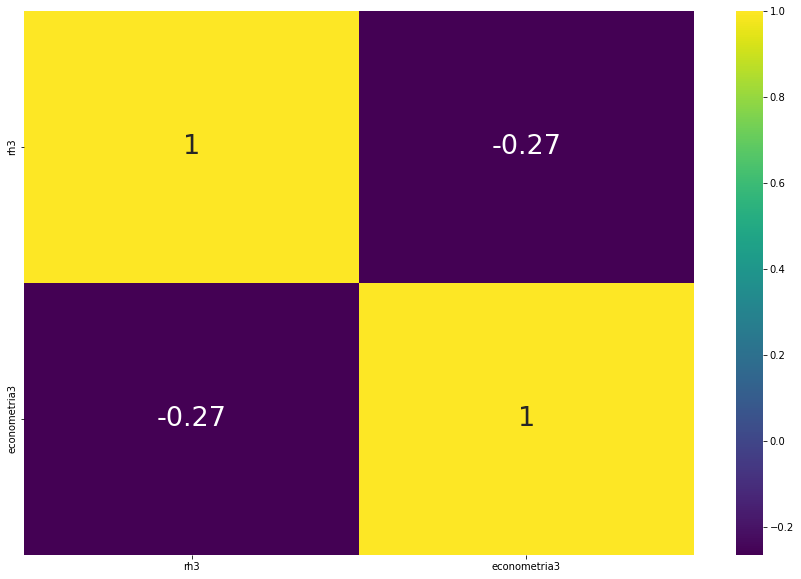

In [ ]:
corr3 = df_salarios[['rh3','econometria3']].corr()
corr3

plt.figure(figsize=(15,10))
sns.heatmap(corr3, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

###Estimando um modelo 
variáveis preditoras com correlação baixa

In [ ]:
modelo_3 = sm.OLS.from_formula('salario ~ rh3 + econometria3',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_3.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     28.77
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.64e-05
Time:                        18:06:33   Log-Likelihood:                -93.759
No. Observations:                  15   AIC:                             193.5
Df Residuals:                      12   BIC:                             195.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1246.6172    163.783      7.611      0.000     889.765    1603.469
rh3             -3.4184     12.263     -0.279      0.785     -30.137      23.300
econometria3   126.5746     17.494      7.235      0.000      88.459     164.691
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.396
Skew:                           0.597   Prob(JB):                        0.498
Kurtosis:                       2.101   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

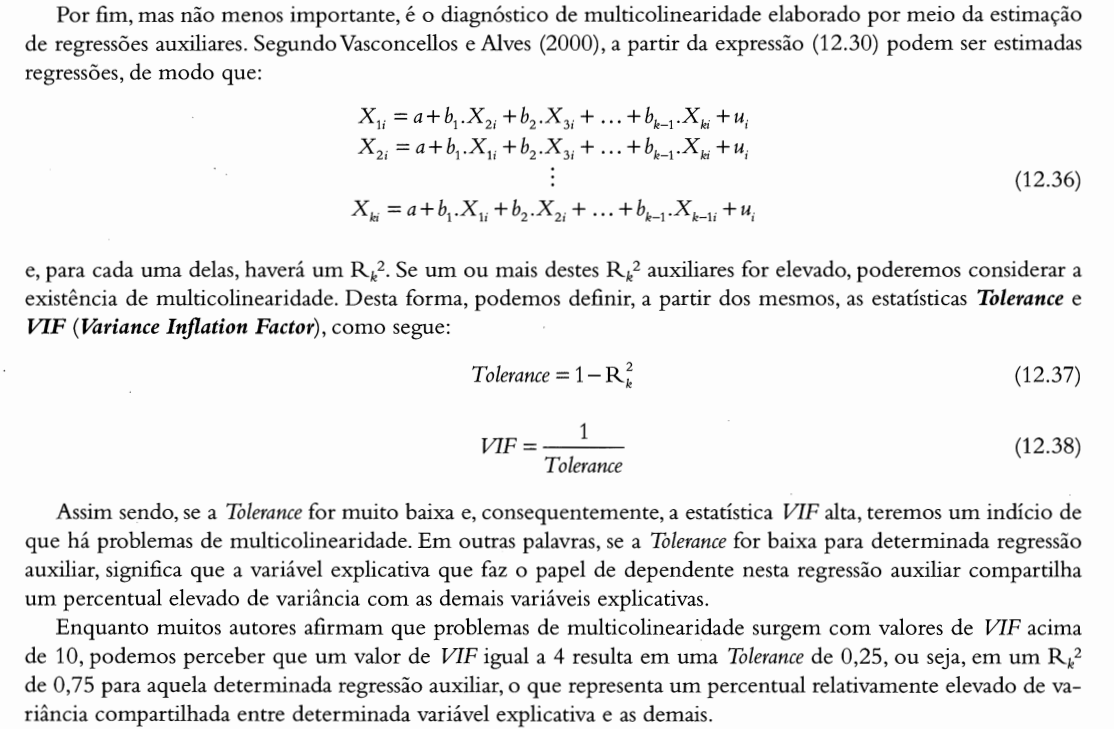

FÁVERO, Luiz Paulo Lopes e BELFIORE, Patrícia Prado. Manual de análise de dados: estatística e modelagem multivariada com excel, SPSS e stata. . Rio de Janeiro: Elsevier. . Acesso em: 05 mar. 2023. , 2017

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_salarios[['rh3','econometria3']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])


,VIF,Tolerance
const,20.465195,0.048863
rh3,1.075576,0.929735
econometria3,1.075576,0.929735


## CORRELAÇÃO MUITO ALTA, PORÉM NÃO PERFEITA

<AxesSubplot:>

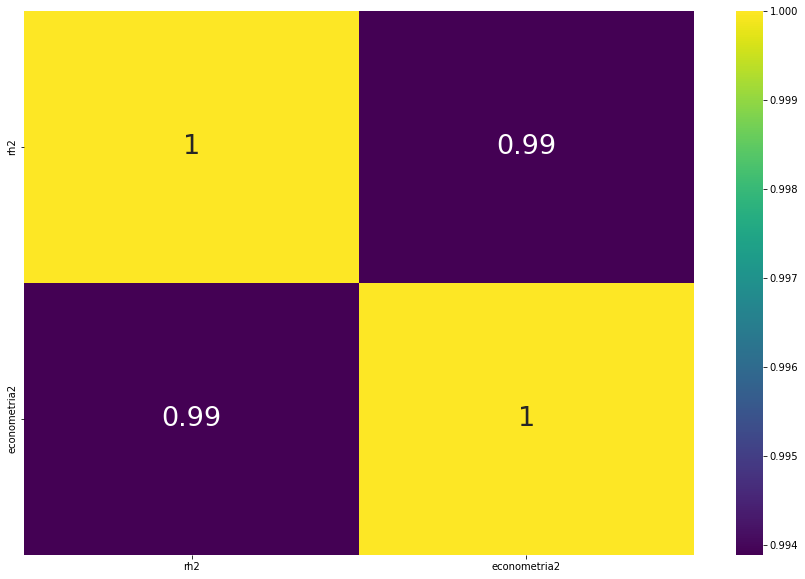

In [ ]:
corr2 = df_salarios[['rh2','econometria2']].corr()
corr2

plt.figure(figsize=(15,10))
sns.heatmap(corr2, annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':27})

Estimando um modelo com variáveis preditoras com correlação quase perfeita

In [ ]:
modelo_2 = sm.OLS.from_formula('salario ~ rh2 + econometria2',
                               df_salarios).fit()

# Parâmetros do modelo
modelo_2.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     29.10
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.50e-05
Time:                        18:19:56   Log-Likelihood:                -93.688
No. Observations:                  15   AIC:                             193.4
Df Residuals:                      12   BIC:                             195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1241.8527    130.172      9.540      0.000     958.233    1525.473
rh2            194.0845    152.087      1.276      0.226    -137.285     525.454
econometria2  -139.4577    318.348     -0.438      0.669    -833.079     554.164
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.309
Skew:                           0.554   Prob(JB):                        0.520
Kurtosis:                       2.068   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nesse caso o modelo apresentou alto R² mas betas estatíticamente não significantes

Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

In [ ]:
X = df_salarios[['rh2','econometria2']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,13.049699,0.076630
rh2,82.061458,0.012186
econometria2,82.061458,0.012186


Alto VIF e baixa Tolerance indica um problema de multicolinearidade.

A multicolinearidade representa um dos problemas mais dificeis de serem tratados em modelagem de dados. 
Enquanto alguns apenas aplicam o procedimento Stepwíse, para que sejam eliminadas as variáveis explicativas que 
estão correlacionadas, o que de fato pode corrigir a multicolinearidade, tal solução pode criar um problema de 
especificação pela omissão de variável relevante, conforme discutiremos na seção 12.3.5. 
A criação de fatores ortogonais a partir das variáveis explicativas, por meio da aplicação da técnica de análise 
fatorial, pode corrigir problemas de multicolinearidade. Para efeitos de previsão, entretanto, é sabido que os valores correspondentes aos fatores para novas observações não serão conhecidos, o que gera um problema para o 
pesquisador. Além disso, a criação de fatores sempre acarreta perda de uma parcela de variância das variáveis explicativas originais. 
A boa notícia, conforme também discutem Vasconcellos e Alves (2000), é que a existência de multicolinearidade não afeta a intenção de elaboração de previsões, desde que as mesmas condições que geraram os resultados 
se mantenham para a previsão. Desta forma, as previsões incorporarão o mesmo padrão de relação entre as variáveis explicativas, o que não representa problema algum. Gujarati (2011) ainda destaca que a existência de altas 
correlações entre variáveis explicativas não gera necessariamente estimadores ruins ou fracos e que a presença de 
multicolinearidade não significa que o modelo possui problemas. Em outras palavras, alguns autores argumentam 
que uma solução para a multicolinearidade é identificá-la, reconhecê-la e não fazer nada.

FÁVERO, Luiz Paulo Lopes e BELFIORE, Patrícia Prado. Manual de análise de dados: estatística e modelagem multivariada com excel, SPSS e stata. . Rio de Janeiro: Elsevier. . Acesso em: 05 mar. 2023. , 2017